# Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [60]:
df_exp = pd.read_csv("C:\\Users\\niels\\OneDrive\\Documenten\\GitHub\\revolve2\\morphological_measures_experiment_a990e53b-ea52-48f8-93e2-4950360c19a6.csv")
df_exp1 = pd.read_csv("C:\\Users\\niels\\OneDrive\\Documenten\\GitHub\\revolve2\\morphological_measures_experiment_26ebc609-1176-42e7-b2b3-d775414d0a80.csv")
df_exp2 = pd.read_csv("C:\\Users\\niels\\OneDrive\\Documenten\\GitHub\\revolve2\\morphological_measures_experiment_b14c9a78-faba-4434-b918-e8feae97d299.csv")	
df_exp3 = pd.read_csv("C:\\Users\\niels\\OneDrive\\Documenten\\GitHub\\revolve2\\morphological_measures_experiment_9ec6edfe-3f57-40bd-9f8c-f1910f6e7994.csv")
df_exp4 = pd.read_csv("C:\\Users\\niels\\OneDrive\\Documenten\\GitHub\\revolve2\\morphological_measures_experiment_87a7e630-9441-4977-9751-05c613482365.csv")
df_exp5 = pd.read_csv("C:\\Users\\niels\\OneDrive\\Documenten\\GitHub\\revolve2\\morphological_measures_experiment_acb12463-fdbf-4935-becb-1f142f3e9cff.csv")
df_exp6 = pd.read_csv("C:\\Users\\niels\\OneDrive\\Documenten\\GitHub\\revolve2\\morphological_measures_experiment_66d67ae6-d6c1-4b9e-8ee6-99f4e52cc43b.csv")

# Concat
df_exp = pd.concat([df_exp, df_exp1])
df_exp = pd.concat([df_exp, df_exp2])
df_exp = pd.concat([df_exp, df_exp3])
df_exp = pd.concat([df_exp, df_exp4])
df_exp = pd.concat([df_exp, df_exp5])
df_exp = pd.concat([df_exp, df_exp6])

# Plot data over time

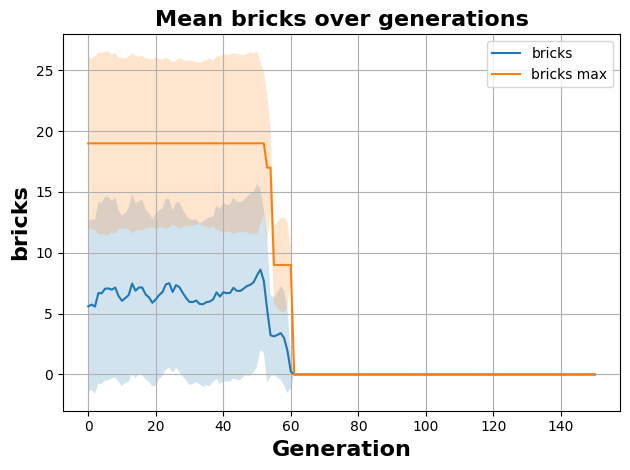

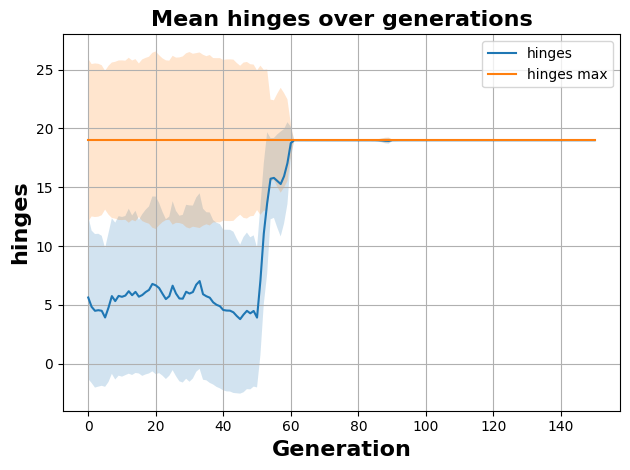

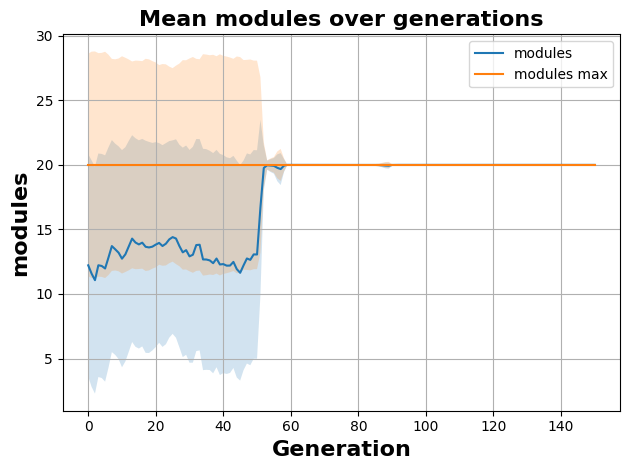

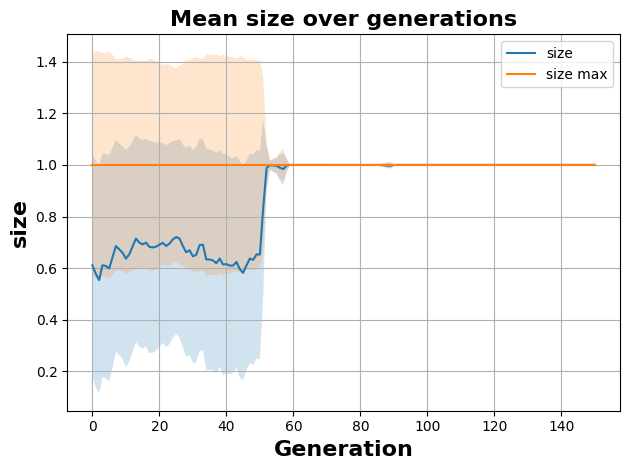

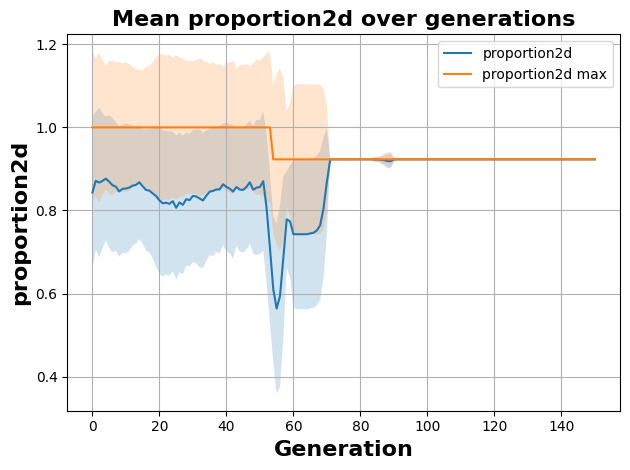

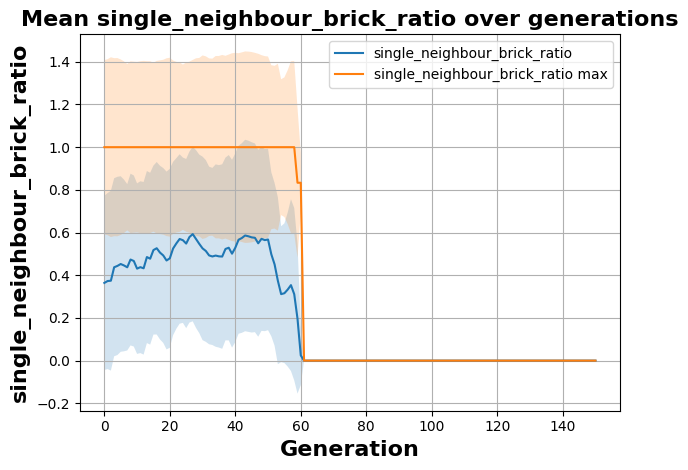

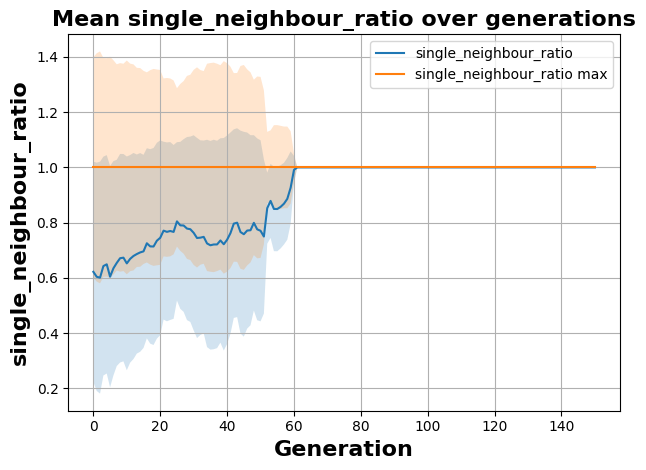

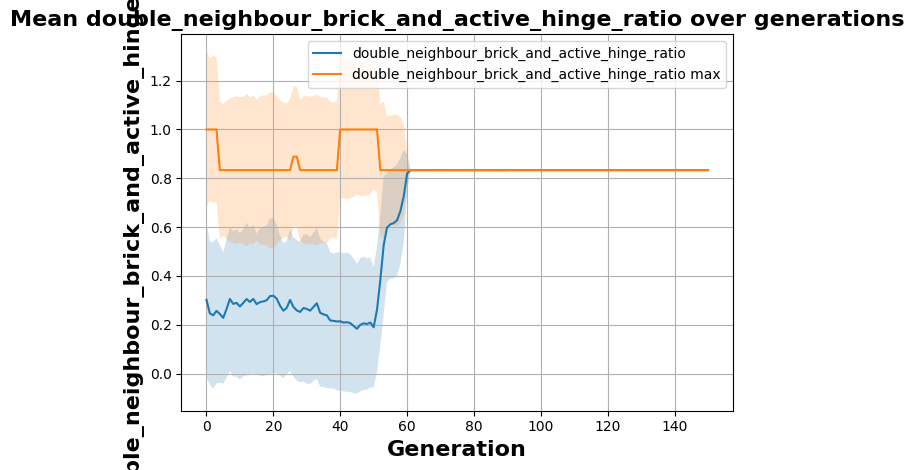

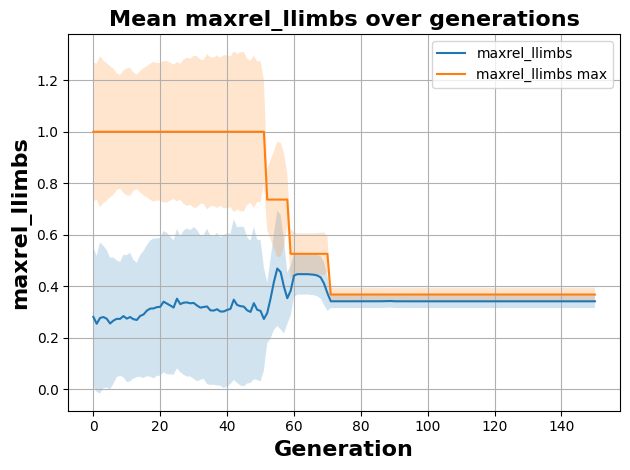

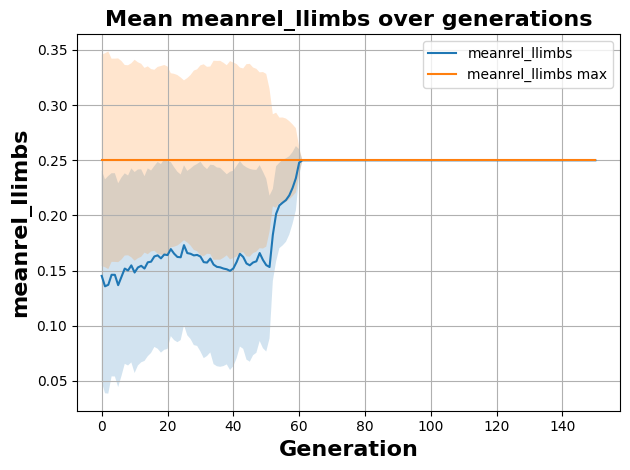

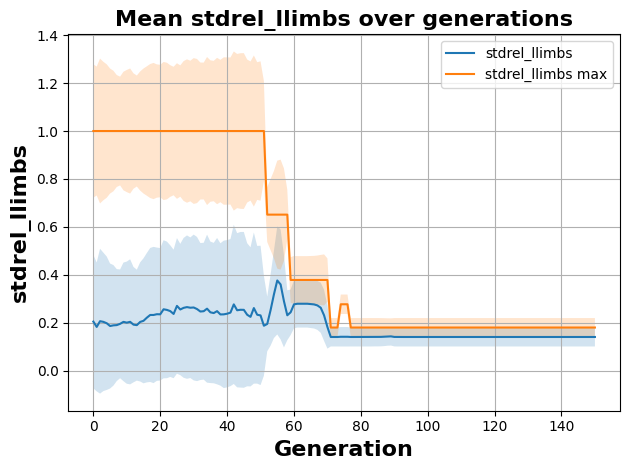

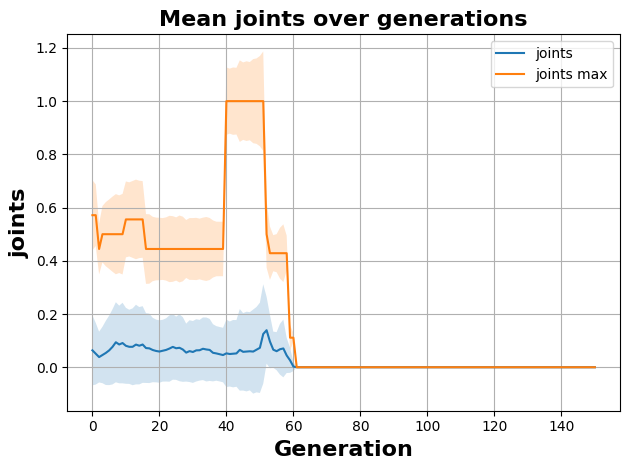

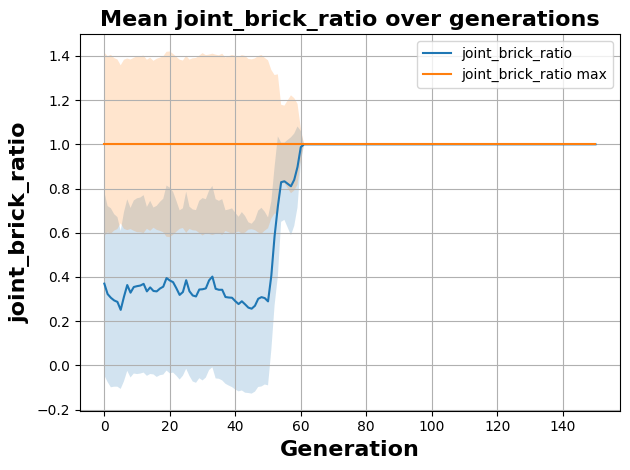

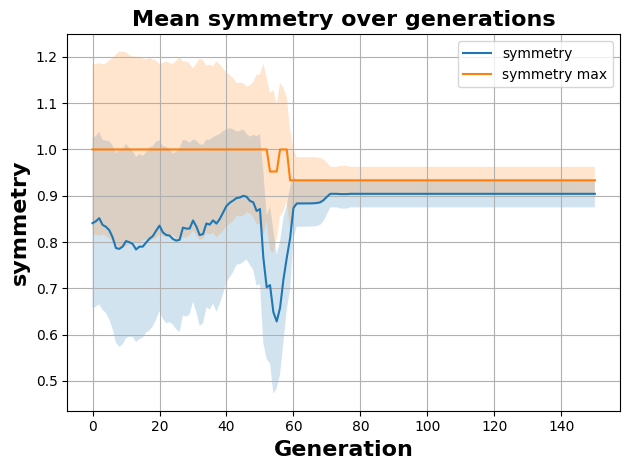

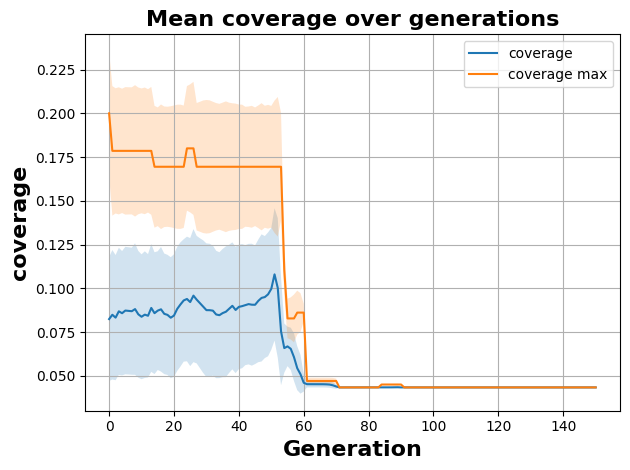

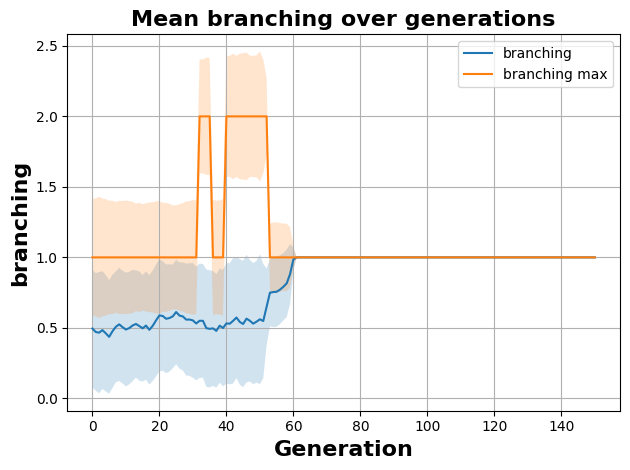

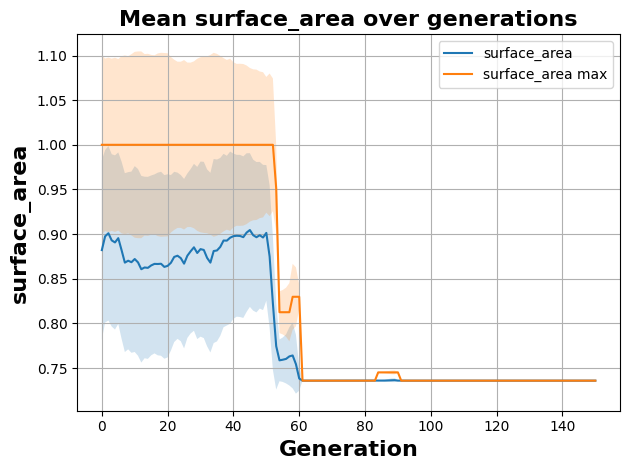

In [16]:
# Group and apply
cols4group = [col for col in df_exp.columns if col not in ["id_string"]]
mean_exp = df_exp.loc[:, cols4group].groupby(["generation_index"]).mean()
mean_std_exp = df_exp.loc[:, cols4group].groupby(["generation_index"]).std()
max_exp = df_exp.loc[:, cols4group].groupby(["generation_index"]).max()
max_std_exp = df_exp.loc[:, cols4group].groupby(["generation_index"]).std()

cols2plot = [col for col in df_exp.columns if col not in ["id_string", "experiment_id", "generation_index", "individual_index"]]
for col in cols2plot:
    # ---- Mean
    plt.plot(mean_exp.index, mean_exp.loc[:, col], label=col)
    # Std
    plt.fill_between(mean_exp.index, mean_exp.loc[:, col] - mean_std_exp.loc[:, col], mean_exp.loc[:, col] + mean_std_exp.loc[:, col], alpha=0.2)

    # ---- Max
    plt.plot(max_exp.index, max_exp.loc[:, col], label=col + " max")
    # Std
    plt.fill_between(max_exp.index, max_exp.loc[:, col] - max_std_exp.loc[:, col], max_exp.loc[:, col] + max_std_exp.loc[:, col], alpha=0.2)

    # Style
    plt.xlabel("Generation", fontsize = 16, fontweight = 'bold')
    plt.ylabel(col, fontsize = 16, fontweight = 'bold')
    plt.title("Mean " + col + " over generations", fontsize = 16, fontweight = 'bold')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


# Violin Plots

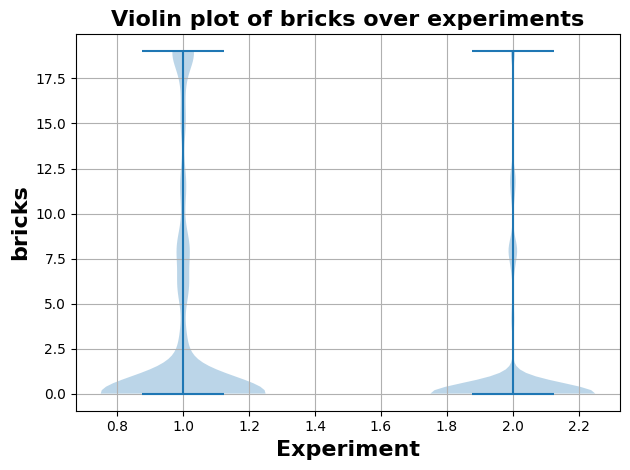

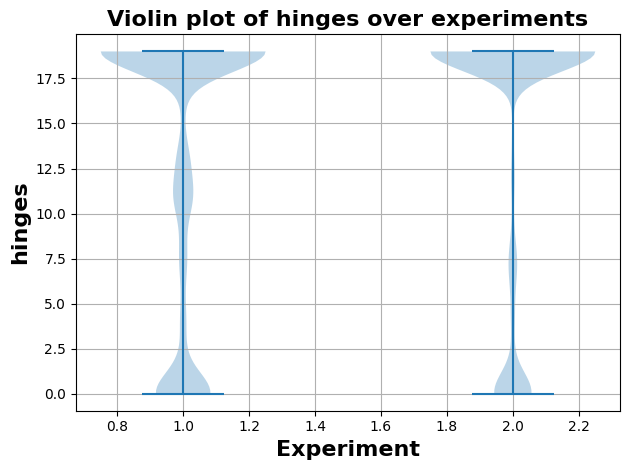

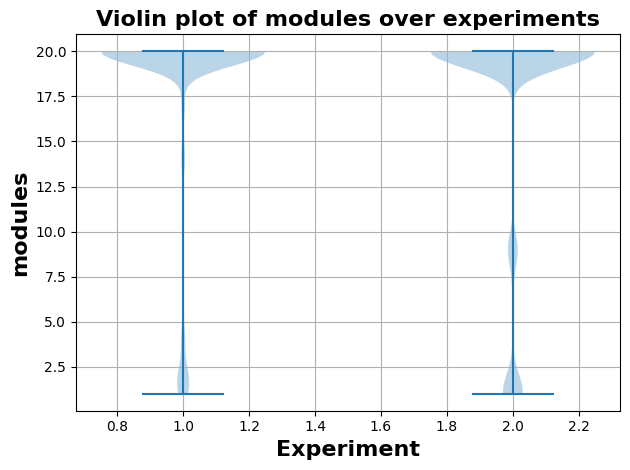

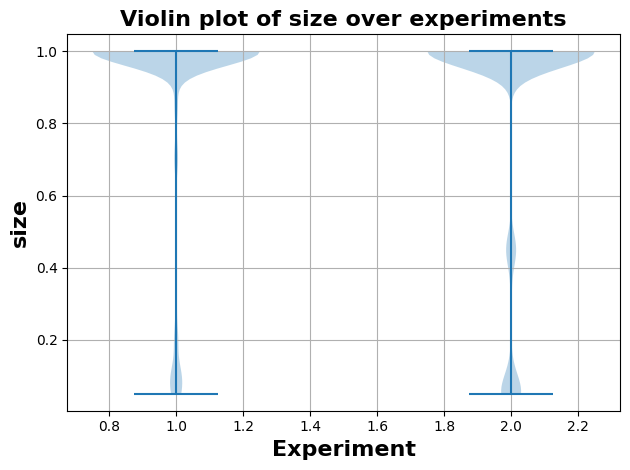

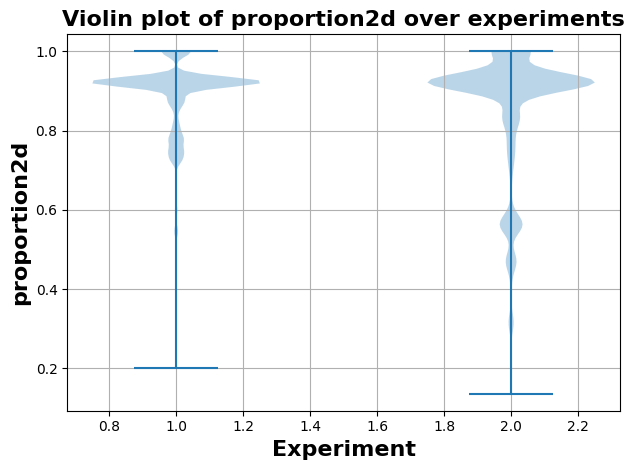

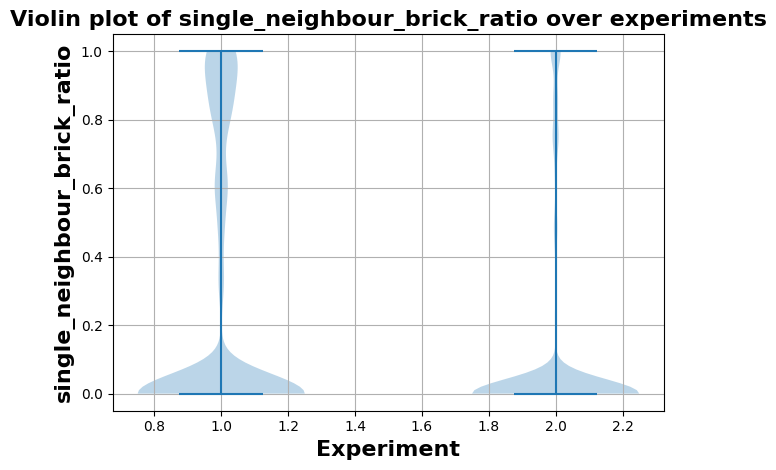

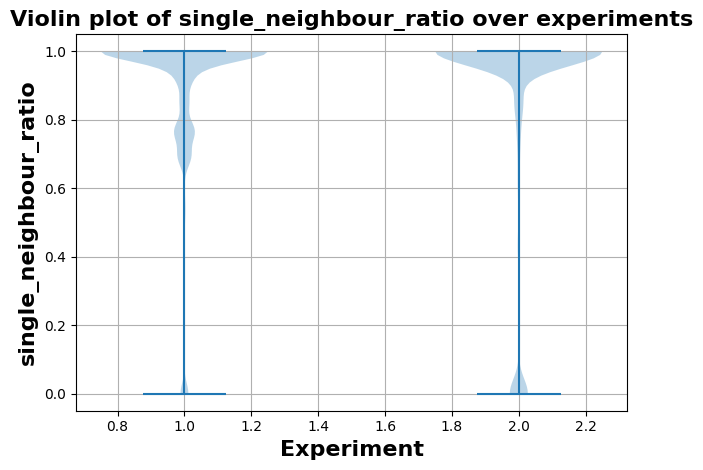

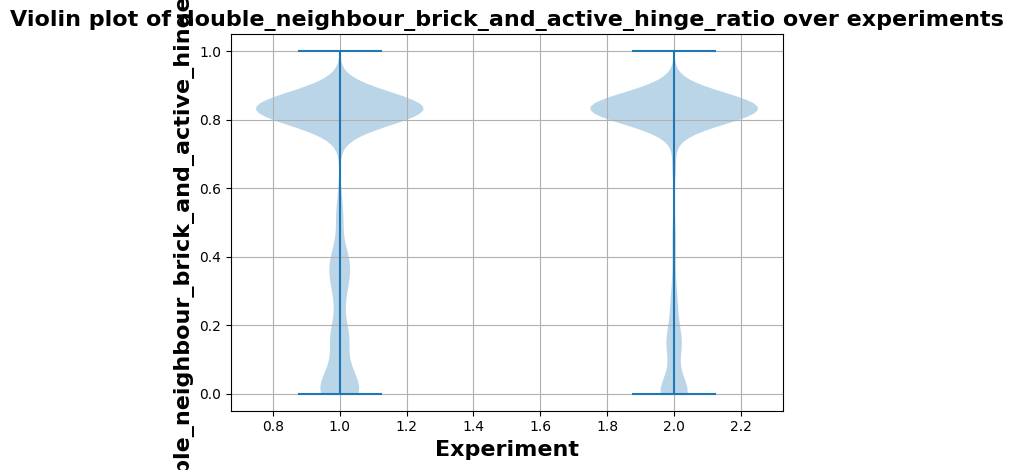

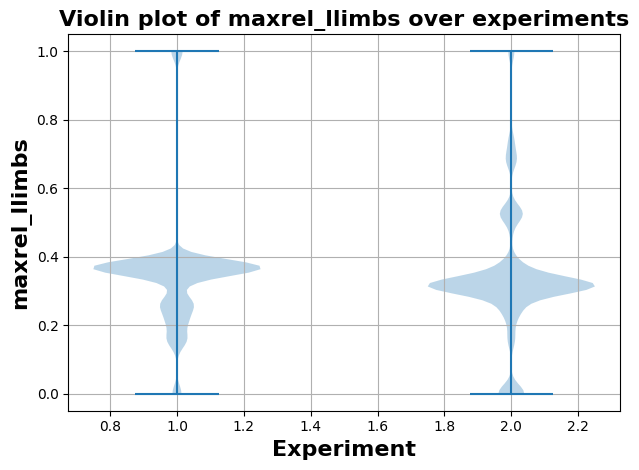

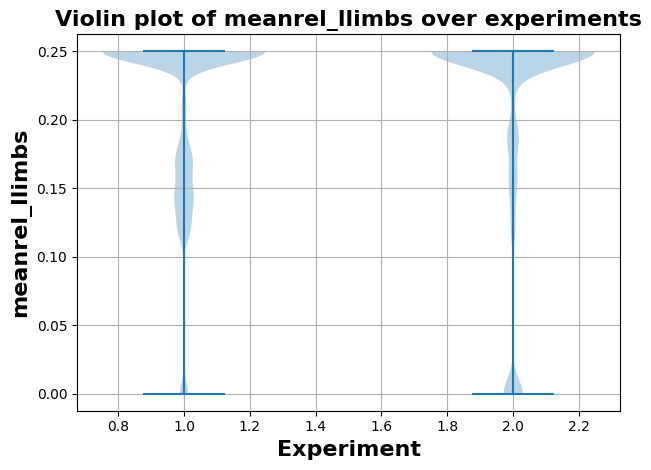

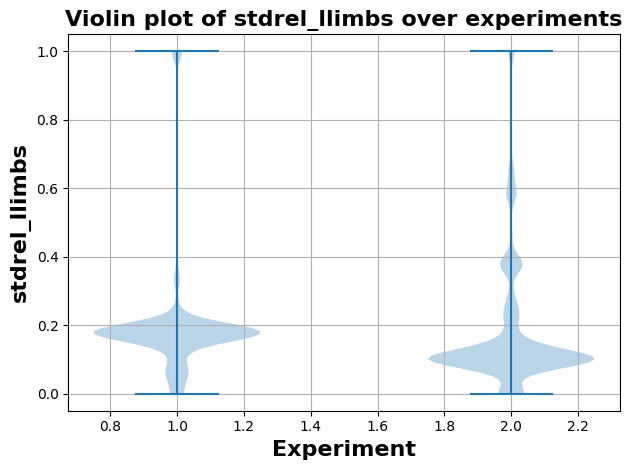

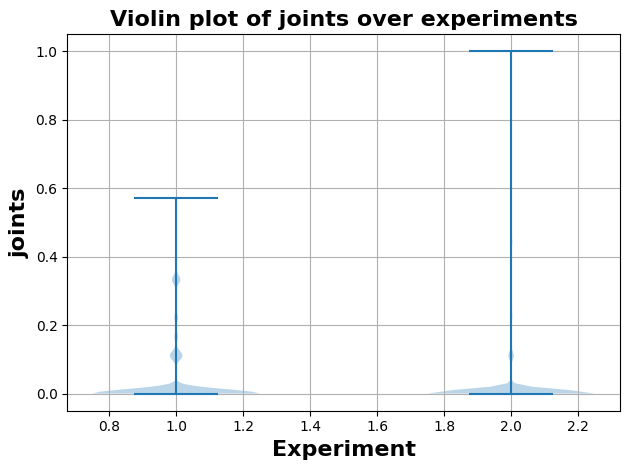

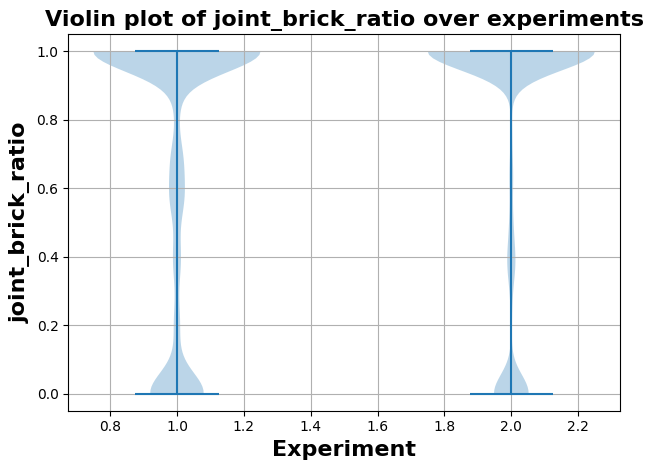

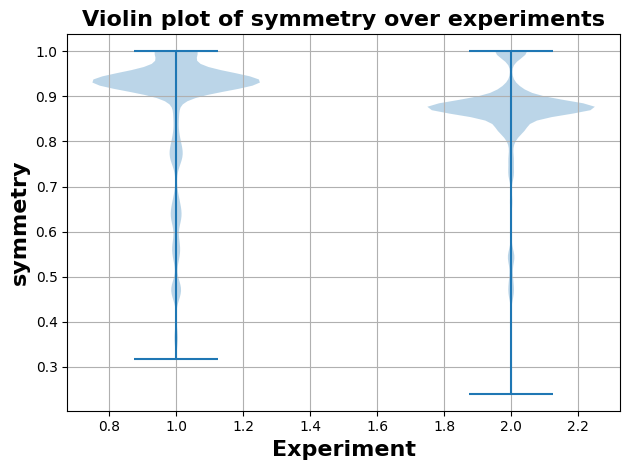

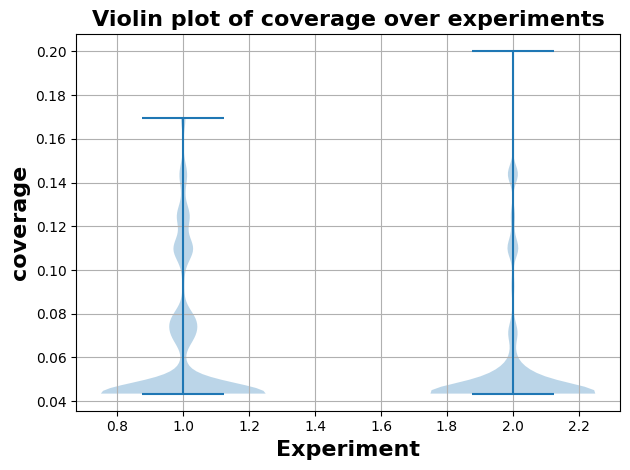

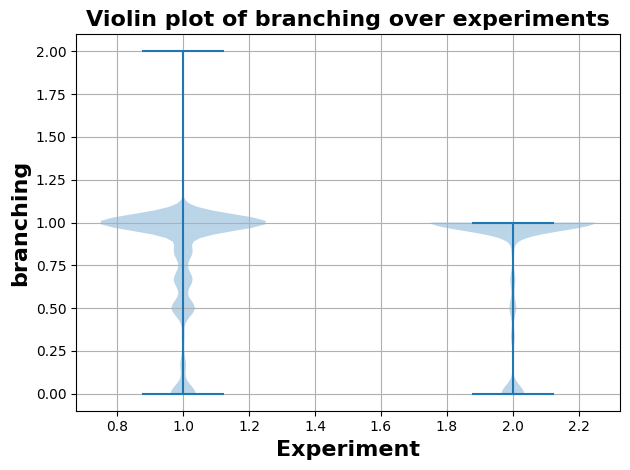

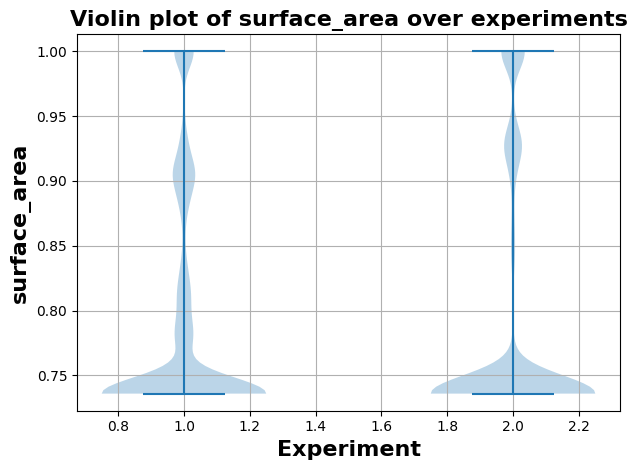

In [18]:
for col in cols2plot:
    # Get data for violin plot
    data4violin = []
    for exp in df_exp["experiment_id"].unique():
        data4violin.append(df_exp.loc[df_exp["experiment_id"] == exp, col])
    # Plot
    plt.violinplot(data4violin)
    plt.xlabel("Experiment", fontsize = 16, fontweight = 'bold')
    plt.ylabel(col, fontsize = 16, fontweight = 'bold')
    plt.title("Violin plot of " + col + " over experiments", fontsize = 16, fontweight = 'bold')
    plt.tight_layout()
    plt.grid()
    plt.show()

# Niches

In [74]:
# Set number of bins
ncubes = {"coverage": 1000, "size": 1000, "proportion2d": 1000, "single_neighbour_brick_ratio": 1000,
          "double_neighbour_brick_and_active_hinge_ratio": 1000, "joints": 1000, "symmetry": 1000, "branching": 1000}
# Create bins
bins = {}
for col in ncubes.keys():
    bins[col] = np.linspace(df_exp[col].min(), df_exp[col].max(), ncubes[col])

# Get cube indices
cubes = {}
for col in ncubes.keys():
    cubes[col] = np.digitize(df_exp[col], bins[col])

# New Dataframe
df_bins = pd.DataFrame(cubes)
# df_bins["generation_index"] = df_exp["generation_index"].values
# df_bins["experiment_id"] = df_exp["experiment_id"].values

# Get generation index
gens = df_exp["generation_index"].values

# Get bin counts per generation and overall
gencubes = {}
overallcubes = {}
for index, row in df_bins.iterrows():
    # Set generation?
    if gens[index] not in gencubes.keys():
        gencubes[gens[index]] = {}
    if gens[index] not in overallcubes.keys():
        overallcubes[gens[index]] = 0
    # Set cube?
    if "-".join([str(row[col]) for col in ncubes.keys()]) not in gencubes[gens[index]].keys():
        gencubes[gens[index]]["-".join([str(row[col]) for col in ncubes.keys()])] = 1
    else:
        gencubes[gens[index]]["-".join([str(row[col]) for col in ncubes.keys()])] += 1

    # Overall
    if "-".join([str(row[col]) for col in ncubes.keys()]) not in overallcubes.keys():
        overallcubes["-".join([str(row[col]) for col in ncubes.keys()])]= 1
    else:
        overallcubes["-".join([str(row[col]) for col in ncubes.keys()])]+= 1

# New phenotypes over time
explored = []
accumulated = []
prev_acc = 0
for gen in range(0, max(list(gencubes.keys())) + 1):
    acc = 0
    for cube in gencubes[gen].keys():
        if cube not in explored:
            explored.append(cube)
            acc += 1
    # Accumulated score        
    accumulated.append(acc + prev_acc)
    prev_acc = accumulated[-1]


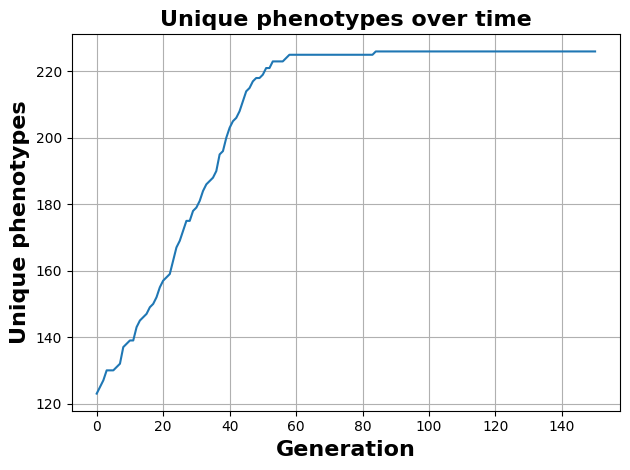

In [75]:
plt.plot(accumulated, "-")
plt.xlabel("Generation", fontsize = 16, fontweight = 'bold')
plt.ylabel("Unique phenotypes", fontsize = 16, fontweight = 'bold')
plt.title("Unique phenotypes over time", fontsize = 16, fontweight = 'bold')
plt.grid()
plt.tight_layout()
plt.show()

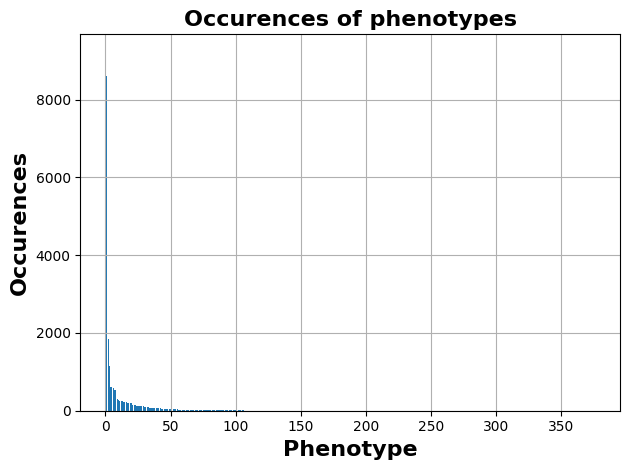

In [79]:
cubevalues = list(overallcubes.values())
cubevalues.sort(reverse=True)
plt.bar(range(0, len(cubevalues)), cubevalues)
plt.xlabel("Phenotype", fontsize = 16, fontweight = 'bold')
plt.ylabel("Occurences", fontsize = 16, fontweight = 'bold')
plt.title("Occurences of phenotypes", fontsize = 16, fontweight = 'bold')
plt.grid()
plt.tight_layout()
plt.show()


In [82]:
df_exp.loc[df_exp.loc[:, "branching"] == 2, "id_string"]

"6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-"

3397    7|151-B-168-B-169-B001020-170-C40-172-C40-173-...
3496    7|151-B-168-B-169-B001020-170-C40-172-C40-173-...
3593    7|151-B-168-B-169-B001020-170-C40-172-C40-173-...
3684    7|151-B-168-B-169-B001020-170-C40-172-C40-173-...
4199     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4297     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4391     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4392     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4489     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4591     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4592     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4687     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4688     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4782     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4783     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4784     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4883     6|123-B-137-C41-138-A01-139-B001020-140-B-155-B-
4884     6|123